# Numerical Solution of Differential Equations

In [2]:
from scipy.integrate import odeint

## Reformulating the problem

An ordinary dierential equation (ODE) is one that describes a function of a single independent
variable, which we'll call y(t). A textbook example is the driven harmonic oscillator:
d2y
dt2 = 􀀀y + g(t):
The odeint function can \only" solve ODEs of the form
dy
dt
= F(y; t): (5.1)
Fortunately, any explicit ODE can be put into this form. For example, to describe the second-order
ODE for the driven harmonic oscillator to odeint, we must reformulate it as a system of coupled
rst-order equations. First, dene two new variables that will be the components of the vector y:
y1 = y y2 =
dy1
dt
:
Next, write the derivatives of y1 and y2 in terms of y1, y2, and t:
dy1
dt
=
dy
dt
= y2
dy2
dt
=
d2y
dt2 = 􀀀y + g = 􀀀y1 + g:
This allows us to cast our problem, a second-order dierential equation, in the form required by
odeint (Equation 5.1). Here, y is an array with two entries, and F(y; t) returns an array with two
entries:
F(y; t) =

y2
􀀀y1 + g

: (5.2)
Any ODE can be recast in a similar manner.

## Solving an ODE

In [4]:
# y = odeint(F, y0, t)

The variables in the expression are
F { A function F(y; t) that accepts an array and a scalar and returns an array.
y0 { A one-dimensional array with the initial values of y.
t { An array of t values at which y is to be computed. The rst entry of this array is the time at
which the initial values y0 apply.
y { An array of the values of y(t) at the points specied in t.

In [5]:
# Simple Oscilator
def F(y, t):
    """
    Return derivatives for second order ODE y'' = -y
    """
    dy = [0, 0]
    dy[0] = y[1]
    dy[1] = -y[0]
    
    return dy

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
t_min = 0
t_max = 10
dt = 0.1

t = np.arange(t_min, t_max + dt, dt)

initial_conditions = [(1.0, 0.0), (0.0, 1.0)]

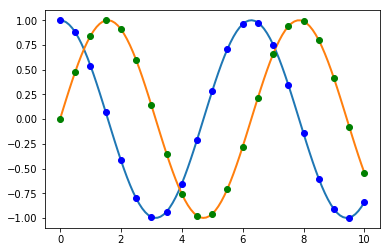

In [11]:
plt.figure()

for y0 in initial_conditions:
    y = odeint(F, y0, t)
    plt.plot(t, y[:, 0], linewidth = 2)
    
skip = 5
t_test = t[::skip]

plt.plot(t_test, np.cos(t_test), 'bo')
plt.plot(t_test, np.sin(t_test), 'go')

## Parameter Dependance

In [12]:
# Parametric oscillator

def F(y, t, spring_constant = 1.0, mass = 1.0):
    dy = [0, 0]
    dy[0] = y[1]
    dy[1] = -(spring_constant / mass) * y[0]
    
    return dy

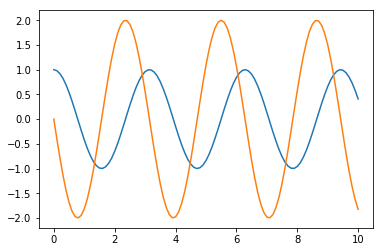

In [16]:
y0 = (1.0, 0.0)
t = np.linspace(0, 10, 101)

yB = odeint(F, y0, t, args = (2.0, 0.5))

plt.plot(t, yB)